# Import Stuff

In [1]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import plotly.offline as py
import plotly.graph_objs as go
import numpy as np
import seaborn as sns
py.init_notebook_mode(connected=True)
%matplotlib inline
%matplotlib notebook
import datetime
from pytz import timezone
est = timezone('US/Eastern')

Using TensorFlow backend.


In [212]:
# data1 = pd.read_csv('bitcoinprices.txt',header=None)
# data2 = pd.read_csv('sentiment6.txt',header=None)

In [213]:
# data2['price']=data2[0]

In [214]:
# data2.info()
# data2.dropna(axis=1)
# data2['sentiment'] = data2.sentiment.astype(float)

In [215]:
# data2.head()

In [216]:
# data = pd.merge(data1,data2, on='stamp', how='inner')

In [217]:
# data.to_csv("merged_data.csv")

In [218]:
# data

In [219]:
# data.describe()

In [220]:
# data['stamp'] = pd.to_datetime(data['stamp'].apply(str),format='%Y%m%d')
# #data = data.sort_values(by='stamp')
# data.head()

In [2]:
data = pd.read_csv("merged_data.csv",index_col=0)

In [3]:
data = data.sort_values(by='stamp')

In [4]:
data=data.reset_index(drop = True)

In [5]:
data

,stamp,price,sentiment
0,2016-02-11,379.2,0.306488
1,2016-02-12,389.0,0.260142
2,2016-02-13,397.7,0.304902
3,2016-02-14,406.8,0.308635
4,2016-02-15,400.9,0.321268
5,2016-02-16,411.9,0.321268
6,2016-02-17,418.4,0.321268
7,2016-02-18,417.7,0.217718
8,2016-02-19,425.9,0.217718
9,2016-02-20,439.2,0.291000


In [6]:
btc_trace = go.Scatter(x=data['stamp'], y=data['price'], name= 'Price')
py.iplot([btc_trace])

In [7]:
data['price'].replace(0, np.nan, inplace=True)
data['price'].fillna(method='ffill', inplace=True)

In [8]:
btc_trace = go.Scatter(x=data['stamp'], y=data['price'], name= 'Price')
py.iplot([btc_trace])

In [9]:
datag = data[['price','sentiment']].groupby(data['stamp']).mean()


In [10]:
datag

,price,sentiment
stamp,,
2016-02-11,379.2,0.306488
2016-02-12,389.0,0.260142
2016-02-13,397.7,0.304902
2016-02-14,406.8,0.308635
2016-02-15,400.9,0.321268
2016-02-16,411.9,0.321268
2016-02-17,418.4,0.321268
2016-02-18,417.7,0.217718
2016-02-19,425.9,0.217718


In [11]:
from sklearn.preprocessing import MinMaxScaler
values = datag['price'].values.reshape(-1,1)
sentiment = datag['sentiment'].values.reshape(-1,1)
values = values.astype('float32')
sentiment = sentiment.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [12]:
train_size = int(len(scaled) * 0.7)
test_size = len(scaled) - train_size
train, test = scaled[0:train_size,:], scaled[train_size:len(scaled),:]
print(len(train), len(test))
split = train_size

449 193


In [13]:
len(test)

193

In [14]:
def create_dataset(dataset, look_back, sentiment, sent=False):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        if i >= look_back:
            a = dataset[i-look_back:i+1, 0]
            a = a.tolist()
            if(sent==True):
                a.append(sentiment[i].tolist()[0])
            dataX.append(a)
            dataY.append(dataset[i + look_back, 0])
    #print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [15]:
look_back = 2
trainX, trainY = create_dataset(train, look_back, sentiment[0:train_size],sent=True)
testX, testY = create_dataset(test, look_back, sentiment[train_size:len(scaled)], sent=True)


In [16]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [261]:
model = Sequential()
model.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(100))
model.add(Dense(40))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=150, batch_size=100, validation_data=(testX, testY), verbose=0, shuffle=False)

In [270]:
model.save('my_model.h5')

In [17]:
from keras.models import load_model
model=load_model('my_model.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [18]:
yhat = model.predict(testX)

In [19]:
yhat_inverse_sent = scaler.inverse_transform(yhat.reshape(-1, 1))
testY_inverse_sent = scaler.inverse_transform(testY.reshape(-1, 1))

In [20]:
from sklearn.metrics import r2_score
r_square = r2_score(testY_inverse_sent, yhat_inverse_sent)*100
print('R square for this model: %.2f' %(r2_score(testY_inverse_sent, yhat_inverse_sent)*100))

R square for this model: 70.64


C:\Users\prems\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning:

The 'withdash' parameter of text() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'withdash', they should be pass as keyword, not positionally.

C:\Users\prems\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning:


The TextWithDash class was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Annotation instead.



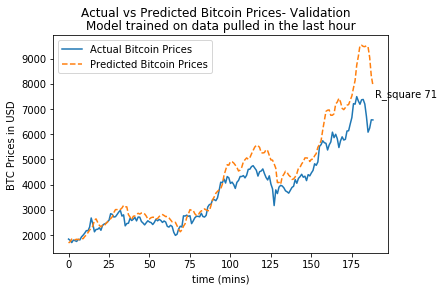

In [22]:
pyplot.figure()
pyplot.suptitle('Actual vs Predicted Bitcoin Prices- Validation')
pyplot.title('Model trained on data pulled in the last hour')
pyplot.ylabel('BTC Prices in USD')
pyplot.xlabel('time (mins)')
pyplot.plot(testY_inverse_sent, ls = 'solid', label = 'Actual')
pyplot.plot(yhat_inverse_sent, ls = 'dashed', label = 'Predicted')
pyplot.legend(['Actual Bitcoin Prices', 'Predicted Bitcoin Prices'])
pyplot.text(len(testY_inverse_sent) , max(testY_inverse_sent), 'R_square %.0f'%r_square, withdash = True)
pyplot.show()


In [23]:
import queue 
import time

import queue
import matplotlib.pyplot as plt
true_q = queue.Queue()
pred_q = queue.Queue()

In [24]:
def process_data(in_data):
    out_data = []
    for line in in_data:
        out_data.append(float(line.split(',')[0]))
    return np.array(out_data).reshape(-1,1)
prev = 15000
threshold = 0.05

In [25]:
btc = pd.read_csv('live_bitcoin.csv',header=None)
sent = pd.read_csv('live_tweet.csv',header=None)

In [26]:
# %matplotlib inline
# import numpy as np
# import matplotlib.pyplot as plt

# from matplotlib import animation, rc
# from IPython.display import HTML

In [27]:
# plt.rcParams['animation.html']='jshtml'

In [28]:
# fig, ax = plt.subplots()

# ax.set_xlim(( 0, 2))
# ax.set_ylim((-2, 2))

# line, = ax.plot([], [], lw=2)

In [29]:
# def init():
#     line.set_data([], [])
#     return (line,)

In [30]:
# def animate(i):
#     x = np.linspace(0, 2, 100)
#     y = np.sin(2 * np.pi * (x - 0.01 * i))
#     line.set_data(x, y)
#     return (line,)

In [175]:
# anim = animation.FuncAnimation(fig, animate, init_func=init,
#                                frames=100, interval=20, 
#                                blit=True)

In [201]:
# HTML(anim.to_jshtml())

In [203]:
# idx=[]
# for i in range(0,len(predict)):
#     idx.append(i)
    

In [205]:
# predict_df

In [51]:
btc = open('live_bitcoin.csv','r')
sent = open('live_tweet.csv','r')
bit_data = btc.readlines()
sent_data = sent.readlines()
predict_df=pd.DataFrame(columns=['time','predicted','actual'])
predict_df = predict_df.fillna(0)
predict=[]
actualdata=[]
for i in range(5,len(sent_data)):
    bit_data1 = process_data(bit_data[i-5:i])
    sent_data1 = process_data(sent_data[i-5:i])
    live = scaler.transform(bit_data1)
    testX, testY = create_dataset(live, 2, sent_data1, sent=True)
    testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    yhat = model.predict(testX)
    yhat_inverse = scaler.inverse_transform(yhat.reshape(-1, 1))
    testY_inverse= scaler.inverse_transform(testY.reshape(-1, 1))
    
    predict.append(yhat_inverse)
    actualdata.append(testY_inverse)
    predict_df.loc[i-5]=[i-5]+[yhat_inverse[0][0]]+[testY_inverse[0][0]]
    true_q.put(bit_data1[4])
    pred_q.put(yhat_inverse[0])
    val = 100*((yhat_inverse[0][0] - prev)/prev)
    if val > threshold:
        decision = 'Buy!!!'
        print(' - Price of Bitcoin is expected to rise.')
    elif val <-threshold:
        decision = 'Sell!!!'
        print(' - Price of Bitcoin is expected to drop.')
    else:
        decision = 'Hold'
    prev = yhat_inverse[0][0]
    print(yhat_inverse[0][0],bit_data1[0][0],sent_data1[4][0],datetime.datetime.now(tz=est).strftime('%Y-%m-%d %H:%M:%S'),decision)
    time.sleep(1)

 - Price of Bitcoin is expected to rise.
14719.829 10449.6013682 0.04291666666666667 2019-09-10 23:32:51 Buy!!!
14715.151 10449.6013682 0.04291666666666667 2019-09-10 23:32:52 Hold
14716.605 10444.215798 0.04291666666666667 2019-09-10 23:32:53 Hold
14713.585 10441.4073973 0.04291666666666667 2019-09-10 23:32:54 Hold
14712.385 10441.4073973 0.04291666666666667 2019-09-10 23:32:55 Hold
14711.31 10438.94746 0.04291666666666667 2019-09-10 23:32:56 Hold
14715.082 10438.94746 0.040873015873015874 2019-09-10 23:32:57 Hold
14717.603 10438.94746 0.040873015873015874 2019-09-10 23:32:58 Hold
14717.029 10444.1104691 0.040873015873015874 2019-09-10 23:32:59 Hold
14714.684 10444.1104691 0.040873015873015874 2019-09-10 23:33:00 Hold
14712.586 10439.3041963 0.03901515151515152 2019-09-10 23:33:01 Hold
14714.628 10439.3041963 0.03901515151515152 2019-09-10 23:33:02 Hold
14716.616 10439.3041963 0.03901515151515152 2019-09-10 23:33:03 Hold


KeyboardInterrupt: 

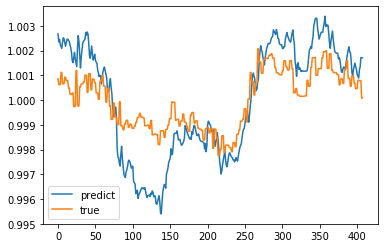

In [33]:
pyplot.plot(predict_df['predicted']/predict_df['predicted'].mean(), label='predict')
pyplot.plot(predict_df['actual']/predict_df['actual'].mean(), label='true')
pyplot.legend()
pyplot.show()

In [ ]:
while True:
    btc = open('live_bitcoin1.csv','r')
    sent = open('live_tweet1.csv','r')
    bit_data = btc.readlines()
    sent_data = sent.readlines()
    bit_data = process_data(bit_data[len(bit_data)-5:])
    sent_data = process_data(sent_data[len(sent_data)-5:])
    live = scaler.transform(bit_data)
    testX, testY = create_dataset(live, 2, sent_data, sent=True)
    testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    yhat = model.predict(testX)
    yhat_inverse = scaler.inverse_transform(yhat.reshape(-1, 1))
    true_q.put(bit_data[4])
    pred_q.put(yhat_inverse[0])
    val = 100*((yhat_inverse[0][0] - prev)/prev)
    if val > threshold:
        decision = 'Buy!!!'
        print(' - Price of Bitcoin is expected to rise.')
    elif val <-threshold:
        decision = 'Sell!!!'
        print(' - Price of Bitcoin is expected to drop.')
    else:
        decision = 'Hold'
    prev = yhat_inverse[0][0]
    print(yhat_inverse[0][0],bit_data[0][0],sent_data[4][0],datetime.datetime.now(tz=est).strftime('%Y-%m-%d %H:%M:%S'),decision)
    time.sleep(60)

 - Price of Bitcoin is expected to drop.
14153.183 10107.2843267 0.06621863799283155 2019-09-10 23:36:20 Sell!!!
14156.02 10107.2843267 0.06621863799283155 2019-09-10 23:37:20 Hold
14157.555 10109.1216886 0.06370967741935483 2019-09-10 23:38:20 Hold
14161.668 10109.1216886 0.06583333333333334 2019-09-10 23:39:20 Hold
14165.253 10109.1216886 0.059482758620689656 2019-09-10 23:40:20 Hold
14167.015 10114.7585415 0.059482758620689656 2019-09-10 23:41:20 Hold
14167.479 10114.7585415 0.059482758620689656 2019-09-10 23:42:21 Hold
14166.383 10114.7585415 0.065 2019-09-10 23:43:21 Hold
14165.404 10112.5178978 0.0609375 2019-09-10 23:44:21 Hold
14167.601 10112.5178978 0.0609375 2019-09-10 23:45:21 Hold
14171.632 10112.5178978 0.0609375 2019-09-10 23:46:21 Hold
14174.037 10118.0220914 0.0609375 2019-09-10 23:47:21 Hold
14176.787 10118.0220914 0.06224747474747476 2019-09-10 23:48:21 Hold
14178.628 10118.0220914 0.05794270833333334 2019-09-10 23:49:21 Hold
14179.841 10121.7877314 0.0579427083333333

In [ ]:
----------END OF ASSIGNMENT-------------
\/debugging below\/

In [11]:
#data = pd.read_csv("merged_data.csv")
data= data.replace(to_replace='None', value=np.nan).dropna()
data['sentiment']=pd.to_numeric(data['sentiment'])
datag = data[['price','sentiment']].groupby(data['stamp']).mean()

In [12]:
datag

,price,sentiment
stamp,,
2016-02-11,379.2,0.306488
2016-02-12,389.0,0.260142
2016-02-13,397.7,0.304902
2016-02-14,406.8,0.308635
2016-02-15,400.9,0.321268
2016-02-16,411.9,0.321268
2016-02-17,418.4,0.321268
2016-02-18,417.7,0.217718
2016-02-19,425.9,0.217718


In [13]:
data

,stamp,price,sentiment
573,2016-02-11,379.2,0.306488
427,2016-02-12,389.0,0.260142
212,2016-02-13,397.7,0.304902
113,2016-02-14,406.8,0.308635
590,2016-02-15,400.9,0.321268
321,2016-02-16,411.9,0.321268
352,2016-02-17,418.4,0.321268
200,2016-02-18,417.7,0.217718
35,2016-02-19,425.9,0.217718
532,2016-02-20,439.2,0.291000


In [14]:
from sklearn.preprocessing import MinMaxScaler
values = datag['price'].values.reshape(-1,1)
sentiment = datag['sentiment'].values.reshape(-1,1)
values = values.astype('float32')
sentiment = sentiment.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)


In [15]:
train_size = int(len(scaled) * 0.7)
test_size = len(scaled) - train_size
train, test = scaled[0:train_size,:], scaled[train_size:len(scaled),:]
print(len(train), len(test))
split = train_size

449 193


In [16]:
def create_dataset(dataset, look_back, sentiment, sent=False):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        if i >= look_back:
            a = dataset[i-look_back:i+1, 0]
            a = a.tolist()
            if(sent==True):
                a.append(sentiment[i].tolist()[0])
            dataX.append(a)
            dataY.append(dataset[i + look_back, 0])
    #print(len(dataY))
    return np.array(dataX), np.array(dataY)


In [17]:
look_back = 2
trainX, trainY = create_dataset(train, look_back, sentiment[0:train_size],sent=True)
testX, testY = create_dataset(test, look_back, sentiment[train_size:len(scaled)], sent=True)


In [18]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [19]:
model = Sequential()
model.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(100))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=100, validation_data=(testX, testY), verbose=0, shuffle=False)

yhat = model.predict(testX)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [20]:
yhat_inverse_sent = scaler.inverse_transform(yhat.reshape(-1, 1))
testY_inverse_sent = scaler.inverse_transform(testY.reshape(-1, 1))

In [21]:
rmse_sent = sqrt(mean_squared_error(testY_inverse_sent, yhat_inverse_sent))
print('Test RMSE: %.3f' % rmse_sent)

Test RMSE: 845.386


## Training a simple random model:

In [22]:
from sklearn.preprocessing import MinMaxScaler
values = datag['price'].values.reshape(-1,1)
sentiment = datag['sentiment'].values.reshape(-1,1)
values = values.astype('float32')
sentiment = sentiment.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [23]:
train_size = int(len(scaled) * 0.7)
test_size = len(scaled) - train_size
train, test = scaled[0:train_size,:], scaled[train_size:len(scaled),:]
print(len(train), len(test))
split = train_size

449 193


In [24]:
def create_dataset(dataset, look_back, sentiment, sent=False):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        if i >= look_back:
            a = dataset[i-look_back:i+1, 0]
            a = a.tolist()
            if(sent==True):
                a.append(sentiment[i].tolist()[0])
            dataX.append(a)
            dataY.append(dataset[i + look_back, 0])
    #print(len(dataY))
    return np.array(dataX), np.array(dataY)

### with lookback = 1 (kind of unigram)

In [25]:
look_back = 1
trainX, trainY = create_dataset(train, look_back, sentiment[0:train_size])
testX, testY = create_dataset(test, look_back, sentiment[train_size:len(scaled)])

In [26]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [27]:
model = Sequential()
model.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=100, validation_data=(testX, testY), verbose=0, shuffle=False)

<IPython.core.display.Javascript object>


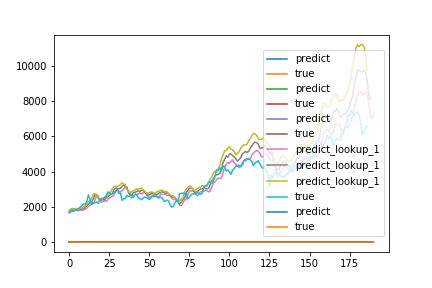

In [28]:
yhat = model.predict(testX)
pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

In [29]:
yhat_inverse_1 = scaler.inverse_transform(yhat.reshape(-1, 1))
testY_inverse_1 = scaler.inverse_transform(testY.reshape(-1, 1))

In [30]:
rmse_1 = sqrt(mean_squared_error(testY_inverse_1, yhat_inverse_1))
print('Test RMSE: %.3f' % rmse_1)

Test RMSE: 440.112


In [31]:
model_1 = model

### with lookback = 2(kind of biram)

In [32]:
look_back = 2
trainX, trainY = create_dataset(train, look_back, sentiment[0:train_size])
testX, testY = create_dataset(test, look_back, sentiment[train_size:len(scaled)])

In [33]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [34]:
model = Sequential()
model.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=100, validation_data=(testX, testY), verbose=0, shuffle=False)

In [35]:
yhat = model.predict(testX)
pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

In [36]:
yhat_inverse_2 = scaler.inverse_transform(yhat.reshape(-1, 1))
testY_inverse_2 = scaler.inverse_transform(testY.reshape(-1, 1))

In [37]:
rmse_2 = sqrt(mean_squared_error(testY_inverse_2, yhat_inverse_2))
print('Test RMSE: %.3f' % rmse_2)

Test RMSE: 875.633


In [38]:
model2 = model

## With lookback = 3

In [39]:
look_back = 3
trainX, trainY = create_dataset(train, look_back, sentiment[0:train_size])
testX, testY = create_dataset(test, look_back, sentiment[train_size:len(scaled)])

In [40]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [41]:
model = Sequential()
model.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=100, validation_data=(testX, testY), verbose=0, shuffle=False)

In [42]:
yhat = model.predict(testX)
pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

In [43]:
yhat_inverse_3 = scaler.inverse_transform(yhat.reshape(-1, 1))
testY_inverse_3 = scaler.inverse_transform(testY.reshape(-1, 1))

In [44]:
rmse_3 = sqrt(mean_squared_error(testY_inverse_3, yhat_inverse_3))
print('Test RMSE: %.3f' % rmse_3)

Test RMSE: 1335.232


In [45]:
model3 = model

## Plotting different lookups

In [46]:
pyplot.plot(yhat_inverse_1, label='predict_lookup_1')
pyplot.plot(yhat_inverse_2, label='predict_lookup_1')
pyplot.plot(yhat_inverse_3, label='predict_lookup_1')
pyplot.plot(testY_inverse_3, label='true')
pyplot.legend()
pyplot.show()

In [47]:
len(datag.index.values)

642

In [48]:
btc_1_trace = go.Scatter(x=datag.index.values[3605-1080-1:], y=yhat_inverse_1.reshape(1080), name= 'predict_lookup_1')
btc_2_trace = go.Scatter(x=datag.index.values[3605-1078-1:], y=yhat_inverse_2.reshape(1078), name= 'predict_lookup_2')
btc_3_trace = go.Scatter(x=datag.index.values[3605-1076-1:], y=yhat_inverse_3.reshape(1076), name= 'predict_lookup_3')
btc_t_trace = go.Scatter(x=datag.index.values[3605-1080-1:], y=testY_inverse_1.reshape(1080), name= 'True')

py.iplot([btc_1_trace,btc_2_trace, btc_3_trace, btc_t_trace])

ValueError: cannot reshape array of size 191 into shape (1080,)

# With sentiment and lookup2

In [49]:
look_back = 2
trainX, trainY = create_dataset(train, look_back, sentiment[0:train_size],sent=True)
testX, testY = create_dataset(test, look_back, sentiment[train_size:len(scaled)], sent=True)

In [50]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [51]:
model = Sequential()
model.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(100))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=100, validation_data=(testX, testY), verbose=0, shuffle=False)

In [52]:
yhat = model.predict(testX)
pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

In [53]:
yhat_inverse_sent = scaler.inverse_transform(yhat.reshape(-1, 1))
testY_inverse_sent = scaler.inverse_transform(testY.reshape(-1, 1))

In [54]:
rmse_sent = sqrt(mean_squared_error(testY_inverse_sent, yhat_inverse_sent))
print('Test RMSE: %.3f' % rmse_sent)

Test RMSE: 987.751


In [55]:
len(yhat)

189

In [56]:
btc_1_trace = go.Scatter(x=datag.index.values[3605-1078-1:][0:500], y=yhat_inverse_sent.reshape(1078)[0:500], name= 'With_Sentiment')
btc_2_trace = go.Scatter(x=datag.index.values[3605-1080-1:][0:500], y=yhat_inverse_1.reshape(1080)[0:500], name= 'No_Sentiment')
btc_3_trace = go.Scatter(x=datag.index.values[3605-1078-1:][0:500], y=testY_inverse_sent.reshape(1078)[0:500], name= 'True')
py.iplot([btc_1_trace,btc_2_trace,btc_3_trace])

ValueError: cannot reshape array of size 189 into shape (1078,)

In [57]:
model_sent = model

## Now go live with the model:

In [58]:
import MySQLdb
#Enter the values for you database connection
dsn_database = "bitcoin"         # e.g. "MySQLdbtest"
dsn_hostname = "173.194.231.244"      # e.g.: "mydbinstance.xyz.us-east-1.rds.amazonaws.com"
dsn_port = 3306                  # e.g. 3306 
dsn_uid = "demo"             # e.g. "user1"
dsn_pwd = "qwerty@123"              # e.g. "Password123"

ModuleNotFoundError: No module named 'MySQLdb'

In [59]:
conn = MySQLdb.connect(host=dsn_hostname, port=dsn_port, user=dsn_uid, passwd=dsn_pwd, db=dsn_database)

NameError: name 'MySQLdb' is not defined

In [60]:
cursor=conn.cursor()
cursor.execute("""SELECT * FROM live_data""")
cursor.fetchone()

NameError: name 'conn' is not defined

In [61]:
print ("\nShow me the records:\n")
rows = cursor.fetchall()
import pprint
pprint.pprint(rows)


Show me the records:



NameError: name 'cursor' is not defined

In [62]:
cursor.execute("""INSERT INTO live_data values(15625,16000,0.8,'1000-01-01 00:00:00');""")

NameError: name 'cursor' is not defined

In [73]:
conn.commit()

In [66]:
cursor.close()

In [172]:
# develop a real time pipeline

In [27]:
import queue 
import time
import matplotlib

In [28]:
matplotlib.__version__

'2.1.0'

In [84]:
import queue
import matplotlib.pyplot as plt
true_q = queue.Queue()
pred_q = queue.Queue()
'''
fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()
fig.canvas.draw()
plt.ion()
'''

def process_data(in_data):
    out_data = []
    for line in in_data:
        out_data.append(float(line.split(',')[0]))
    return np.array(out_data).reshape(-1,1)
prev = 15000
threshold = 0.5
while True:
    btc = open('live_bitcoin.csv','r')
    sent = open('live_tweet.csv','r')
    bit_data = btc.readlines()
    sent_data = sent.readlines()
    bit_data = process_data(bit_data[len(bit_data)-5:])
    sent_data = process_data(sent_data[len(sent_data)-5:])
    live = scaler.transform(bit_data)
    testX, testY = create_dataset(live, 2, sent_data, sent=True)
    testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    yhat = model.predict(testX)
    yhat_inverse = scaler.inverse_transform(yhat.reshape(-1, 1))
    true_q.put(bit_data[4])
    pred_q.put(yhat_inverse[0])
    val = 100*((yhat_inverse[0][0] - prev)/prev)
    if val > threshold:
        decision = 'buy'
    elif val <-threshold:
        decision = 'sell'
    else:
        decision = ''
    prev = yhat_inverse[0][0]
    input_string = "INSERT INTO live_data values ({},{},{},'{}','{}');".format(yhat_inverse[0][0],bit_data[0][0],sent_data[4][0],datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S '),decision)
    cursor.execute(input_string)
    conn.commit()
    time.sleep(60)
    '''
    if true_q.qsize() > 9:
        true_q.get()
        pred_q.get()
        ax.clear()
        ax.plot()
        ax.plot(list(true_q.queue),'-',label='True')
        ax.plot(list(pred_q.queue),'--',label='Predict')
        ax.legend()
        fig.canvas.draw()
        time.sleep(60)
    ''' 
        

KeyboardInterrupt: 

In [75]:
import datetime
datetime.datetime.now()

datetime.datetime(2017, 12, 13, 21, 49, 54, 337601)